# Short Assignment 1: Filtering in Fourier Domain
## SCC0251.2020.1 - Image Processing
### Prof. Dr. Moacir Ponti
### 10284952 - Vitor Gratiere Torres

In [1]:
# Imports
import numpy as np
import imageio
import matplotlib.pyplot as plt

In [2]:
# definition of 2D Fourier Transformation, as taught on lectures
def DFT2D(f, inverse=False):
    F = np.zeros(f.shape, dtype=np.complex64)
    n, m = f.shape[0:2]
    sign = (-1, 1)[inverse]

    for u in np.arange(n):
        for v in np.arange(m):
            for x in np.arange(n):
                for y in np.arange(m):
                    F[u, v] += f[x, y] * \
                        np.exp((sign*1j*2*np.pi)*(((u*x)/n)+((v*y)/m)))

    return F/np.sqrt(n*m)


def filter(f, threshold):
    F = np.zeros(f.shape, dtype=np.complex64)
    n, m = f.shape[0:2]
    countFiltered = 0

    for x in np.arange(n):
        for y in np.arange(m):
            if np.abs(f[x, y]) >= threshold:
                F[x, y] = f[x, y]
            else:
                F[x, y] = 0
                countFiltered += 1
    return countFiltered, F


def imgMean(f):
    n, m = f.shape[0:2]
    mean = 0j
    for x in np.arange(n):
        for y in np.arange(m):
            mean += f[x, y]
    return np.abs(mean/(n*m))

In [3]:
r = imageio.imread(str(input()).rstrip()).astype(np.uint8)
tin = float(input())

/home/ava/documents/classes/SCC0251_DIP/sa01/images/moon_small.png
.05


In [4]:
R = DFT2D(np.asarray(r))

In [5]:
sndMax = np.sort(np.abs(R.flatten()))[-2]
threshold = tin * sndMax

In [6]:
countFiltered, Rfiltered = filter(R, threshold)

(-0.5, 31.5, 31.5, -0.5)

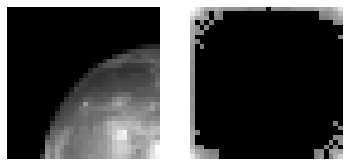

In [7]:
plt.subplot(121)
plt.imshow(r, cmap="gray")
plt.axis('off')
plt.subplot(122)
plt.imshow(np.log(1 + np.abs(Rfiltered)), cmap="gray")
plt.axis('off')

In [8]:
invRfiltered = DFT2D(np.asarray(Rfiltered), True)

(-0.5, 31.5, 31.5, -0.5)

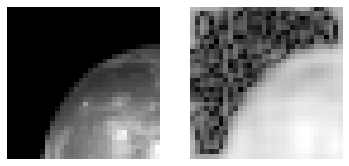

In [9]:
plt.subplot(121)
plt.imshow(r, cmap="gray")
plt.axis('off')
plt.subplot(122)
plt.imshow(np.log(1 + np.abs(invRfiltered)), cmap="gray")
plt.axis('off')

In [10]:
print("Threshold={:.4f}".format(threshold))
print("Filtered Coefficients=", countFiltered, sep='')
print("Original Mean={:.2f}".format(
    np.abs(R[0, 0]/np.sqrt(r.shape[0]*r.shape[1]))))
print("New Mean={:.2f}".format(imgMean(invRfiltered)))

Threshold=33.0947
Filtered Coefficients=900
Original Mean=39.84
New Mean=39.84
